<h1> Материалы курса "Анализ данных в инфромационной безопасности" </h1>

<h2> Домашнее задание к лекции "Анализ данных" </h2>

<p>Студент: Андрей Скороходов, группа UDV</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1-2. Загрузка данных

1.	Загрузите исходный датасет
pd.read_csv()
2.	Сделайте необходимые преобразования при загрузке датасета, чтобы данные выглядели корректно.
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html, корректно обработайте разделители, NA значения, кодировку, исключите ненужные строки, определите заголовок, при необходимости игнорируйте ошибки в кодировке или подправьте исходный файл.

,Name,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
,Units,Unnamed: 1_level_1,degc,degc,degc,Unnamed: 5_level_1,degc,degc,Unnamed: 8_level_1,degc,...,Unnamed: 86_level_1,Unnamed: 87_level_1,Unnamed: 88_level_1,Bar,%,%,%,Bar,degc,Bar
,Digital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,Sample Rate,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,...,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,07:32:00 06/04/2021,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77


## 3. Очистка заголовков

3.	Очистите заголовки колонок от ненужной информации, оставьте только имя устройства и название параметра

In [3]:
data.columns[:4]

MultiIndex([(                                 'Name', ...),
            ('10CT G PBP -1/+1:   --- EKC состояние', ...),
            (      '10CT G PBP -1/+1:   u09 S5 Темп', ...),
            (    '11CT G OVZ +5/+8:   u69 Sair Темп', ...)],
           )

In [4]:
data.columns = data.columns.droplevel([1,2,3])
data.columns[:4]

Index(['Name', '10CT G PBP -1/+1:   --- EKC состояние',
       '10CT G PBP -1/+1:   u09 S5 Темп', '11CT G OVZ +5/+8:   u69 Sair Темп'],
      dtype='object')

In [5]:
data = data.rename(columns={'Name':'time'})
data.head(5)

,time,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.6,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.6,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.6,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.6,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.6,50.0,0.0,0.0,10.23,-6.00,14.77


## 4. Информация о датасете 

4.	Выведите в консоль информацию о датасете: его размер, название колонок, их типы данных
df.info()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26151 entries, 0 to 26150
Data columns (total 96 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   time                                     26151 non-null  object 
 1   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  float64
 2   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64
 3   11CT G OVZ +5/+8:   u69 Sair Темп        26143 non-null  float64
 4   11CT G OVZ +5/+8:   u09 S5 Темп          26143 non-null  float64
 5   11CT G OVZ +5/+8:   --- EKC состояние    26143 non-null  float64
 6   12CT G GSR +2/+4:   u09 S5 Темп          26143 non-null  float64
 7   12CT G GSR +2/+4:   u69 Sair Темп        26143 non-null  float64
 8   12CT G GSR +2/+4:   --- EKC состояние    26143 non-null  float64
 9   13CT G PBP -1/+1:   u69 Sair Темп        26143 non-null  float64
 10  13CT G PBP -1/+1:   --- EKC состояние    26143

## 5. Работа с индексом времени
Преобразуйте колонку со временем в формат datetime, сделайте ее индексом и отсортируйте (даже если датасет уже отсортирован)
pd.to_datetime(), df.index = df[<колонка>], df.sort_index()

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,0.0,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
2021-03-01 00:02:00,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,11.0,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2021-03-01 00:04:00,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,11.0,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
2021-03-01 00:06:00,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,11.0,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
2021-03-01 00:08:00,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,11.0,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:32:00,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,11.0,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77
2021-04-06 07:34:00,11.0,-16.28,7.22,-1.39,0.0,1.00,3.78,11.0,2.28,0.0,...,1.0,1.0,3.0,2.97,29.0,0.0,0.0,11.10,5.78,14.77
2021-04-06 07:36:00,11.0,-1.39,5.78,-4.89,11.0,-3.50,3.00,0.0,1.39,0.0,...,3.0,1.0,3.0,2.97,38.0,0.0,0.0,11.23,5.78,14.77


## 6. Пропущенные значения

6.	Посчитайте количество пропусков в каждой колонке и визуализируйте их
df.isna().sum(), для визуализации можно использовать модуль missingno и метод matrix(df)


10CT G PBP -1/+1:   --- EKC состояние    6
10CT G PBP -1/+1:   u09 S5 Темп          6
11CT G OVZ +5/+8:   u69 Sair Темп        8
11CT G OVZ +5/+8:   u09 S5 Темп          8
11CT G OVZ +5/+8:   --- EKC состояние    8
                                        ..
111CT AG:   Cond Requested Cap           6
111CT AG:   Cond Running Cap             6
111CT AG:   Cond Ctrl Pressure           6
111CT AG:   Sc3 Датч нар воздуха         0
111CT AG:   Cond Reference               6
Length: 95, dtype: int64


<AxesSubplot:>

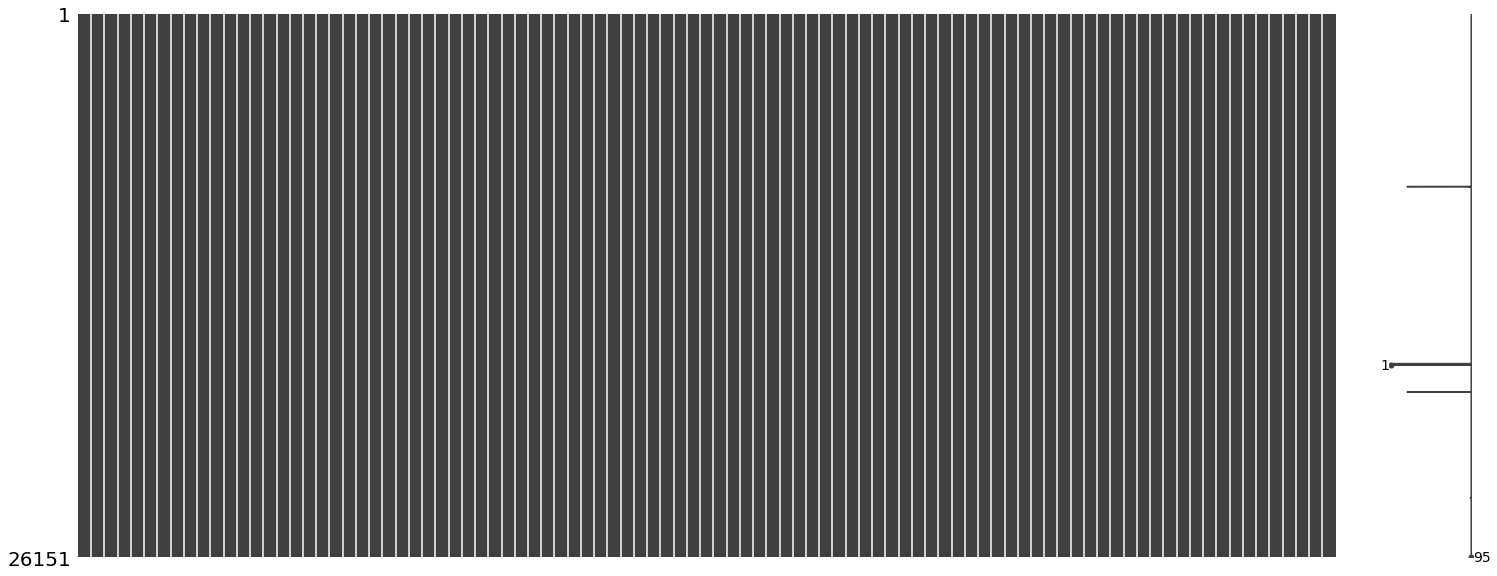

Посмотрим, есть ли признаки без пропусков

<AxesSubplot:title={'center':'пропущенные значения'}>

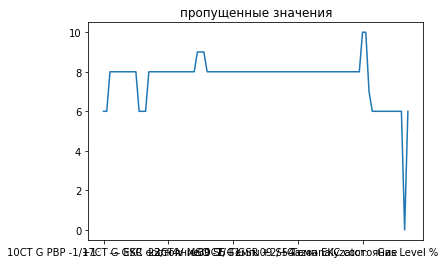

In [9]:
data.isna().sum().plot(title='пропущенные значения')

In [10]:
data.isna().sum()[data.isna().sum()==0]

111CT AG:   Sc3 Датч нар воздуха    0
dtype: int64

посмотрим на пропущенные значения

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-12 13:16:00,0.0,6.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.60,0.0,0.0,0.0,9.20,-2.89,14.77
2021-03-12 13:42:00,11.0,4.00,8.50,2.50,0.0,-1.11,10.00,0.0,7.72,0.0,...,1.0,1.0,2.0,0.60,0.0,0.0,0.0,4.80,-5.00,14.77
2021-03-24 09:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89,NaN
2021-03-24 09:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89,NaN
2021-03-24 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN
2021-03-24 09:32:00,0.0,-7.28,4.61,-5.11,11.0,-1.61,1.50,11.0,-0.72,11.0,...,1.0,1.0,3.0,1.18,19.0,0.0,0.0,11.79,0.78,14.77
2021-03-24 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72,NaN
2021-03-24 10:12:00,11.0,-1.72,7.78,7.72,11.0,-8.89,1.22,11.0,0.11,0.0,...,1.0,2.0,3.0,2.97,50.0,0.0,0.0,13.21,0.72,14.77
2021-03-24 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39,NaN


есть колонки, которые содержат только NaN, можно их удалить

In [12]:
data = data.dropna(subset=data.columns.drop('111CT AG:   Sc3 Датч нар воздуха'), how='all', axis=0)

In [13]:
data.isna().sum().values

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

Можно продолжать чистить дальше, но учитывая количество пропущенных данных относительно общего размера датасета, на этом этапе можно или дропнуть эти строки, заполнить их, сделать resample или сделать интерполяцию.
Мы пойдем по простому пути: заполним их предыдущими значениями.

In [14]:
data = data.fillna(method='ffill')

In [15]:
data.isna().sum().sum()

0

## 7. Типы данных 
Как оптимизировать типы данных в колонках? Насколько меньше станет размер датафрейма после оптимизации типов?
Приведите к типу int колонки с целыми значениями, используйте df.astype(). 
Приведите к типу category колонки с категориальными признаками (признаки, которые принимают ограниченное количество значений, например до 10). 
Сравните замеры получившихся датасетов, оригинальный датасет не перезаписывайте.


Для определения целочисленных колонок воспользуемся знаниями предметной области:
- EKC состояние - это состояние устройства, точно целочисленное, возможно категориальное
- признаки с префиксом Cap или Capacity - это производительность устройств, тоже целочисленное

['10CT G PBP -1/+1:   --- EKC состояние',
 '11CT G OVZ +5/+8:   --- EKC состояние',
 '12CT G GSR +2/+4:   --- EKC состояние',
 '13CT G PBP -1/+1:   --- EKC состояние',
 '14HT SH IKRA -4/-8:   --- EKC состояние',
 '15CT G MSO -1/+1:   --- EKC состояние',
 '16CT G MSO -1/+1:   --- EKC состояние',
 '17CT G GSR +2/+4:   --- EKC состояние',
 '18CT G PTO -1/+1:   --- EKC состояние',
 '19CT G GSR +2/+4:   --- EKC состояние',
 '20CT G GSR +2/+4:   --- EKC состояние',
 '21CT G GSR +2/+4:   --- EKC состояние',
 '22CT G GSR +2/+4:   --- EKC состояние',
 '23CT V MSO -1/+1:   --- EKC состояние',
 '24CT V GSR +2/+4:   --- EKC состояние',
 '25CT V GSR +2/+4:   --- EKC состояние',
 '26CT G MLK +2/+4:   --- EKC состояние',
 '27CT G MLK +2/+4:   --- EKC состояние',
 '28CT G MLK +2/+4:   --- EKC состояние',
 '29CT G MLK +2/+4:   --- EKC состояние',
 '30CT G GSR +2/+4:   --- EKC состояние',
 '34CT G TRT +2/+4:   --- EKC состояние',
 '52CT K PTO -1/+1:   --- EKC состояние',
 '53K VOP POD PTO:   --- EKC сос

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26145 entries, 2021-03-01 00:00:00 to 2021-04-06 07:40:00
Data columns (total 95 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  int32  
 1   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64
 2   11CT G OVZ +5/+8:   u69 Sair Темп        26145 non-null  float64
 3   11CT G OVZ +5/+8:   u09 S5 Темп          26145 non-null  float64
 4   11CT G OVZ +5/+8:   --- EKC состояние    26145 non-null  int32  
 5   12CT G GSR +2/+4:   u09 S5 Темп          26145 non-null  float64
 6   12CT G GSR +2/+4:   u69 Sair Темп        26145 non-null  float64
 7   12CT G GSR +2/+4:   --- EKC состояние    26145 non-null  int32  
 8   13CT G PBP -1/+1:   u69 Sair Темп        26145 non-null  float64
 9   13CT G PBP -1/+1:   --- EKC состояние    26145 non-null  int32  
 10  13CT G PBP 

Мы можем еще уменьшить размер датасета, переведя категориальные признаки в тип category.
Примем для себя, что в категориальные признаки у нас попадут только состояния устройств, т.к. все остальное по физическому смыслу не может быть категориальным

На всякий случай проверим это на состоянии одного из устройств

In [18]:
data['55CT K GSR +2/+4:   --- EKC состояние'].value_counts()

11    14955
0      6985
14     2894
17      881
4       429
10        1
Name: 55CT K GSR +2/+4:   --- EKC состояние, dtype: int64

Все так

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26145 entries, 2021-03-01 00:00:00 to 2021-04-06 07:40:00
Data columns (total 95 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  category
 1   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64 
 2   11CT G OVZ +5/+8:   u69 Sair Темп        26145 non-null  float64 
 3   11CT G OVZ +5/+8:   u09 S5 Темп          26145 non-null  float64 
 4   11CT G OVZ +5/+8:   --- EKC состояние    26145 non-null  category
 5   12CT G GSR +2/+4:   u09 S5 Темп          26145 non-null  float64 
 6   12CT G GSR +2/+4:   u69 Sair Темп        26145 non-null  float64 
 7   12CT G GSR +2/+4:   --- EKC состояние    26145 non-null  category
 8   13CT G PBP -1/+1:   u69 Sair Темп        26145 non-null  float64 
 9   13CT G PBP -1/+1:   --- EKC состояние    26145 non-null  category
 10 

Таким образом мы уменьшили размер датафрейма почти на треть

## 8. Работа с непрерывными признаками
Дайте табличное и графическое статистическое описание признакам, содержащим параметр «Sair» для устройств 21CT, 22CT,…, 30CT.
df.describe(), sns.boxplot(). 


['21CT G GSR +2/+4:   u69 Sair Темп',
 '22CT G GSR +2/+4:   u69 Sair Темп',
 '23CT V MSO -1/+1:   u69 Sair Темп',
 '24CT V GSR +2/+4:   u69 Sair Темп',
 '25CT V GSR +2/+4:   u69 Sair Темп',
 '26CT G MLK +2/+4:   u69 Sair Темп',
 '27CT G MLK +2/+4:   u69 Sair Темп',
 '28CT G MLK +2/+4:   u69 Sair Темп',
 '29CT G MLK +2/+4:   u69 Sair Темп',
 '30CT G GSR +2/+4:   u69 Sair Темп']

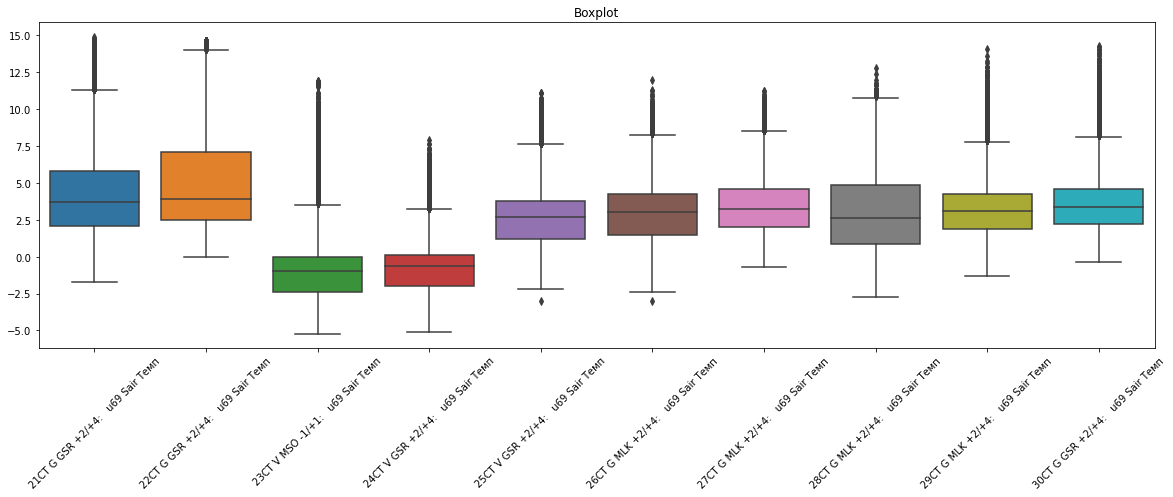

## 9. Ресэмплирование
Ресемплируйте датасет по медианному значению за 4 минуты, отобразите на линейном графике значение признаков col_Sair. График должен быть читабельным, иметь заголовок и легенду, можете выбрать другое значение ресэмплирования, чтобы график лучше читался.
Используйте любые модули (df.plot(), sns, plt, plotly). Ресемплированный датасет сохранять не нужно, просто отобразить.

<AxesSubplot:title={'center':'Ресэмплированные значения признаков с Sair'}, xlabel='time'>

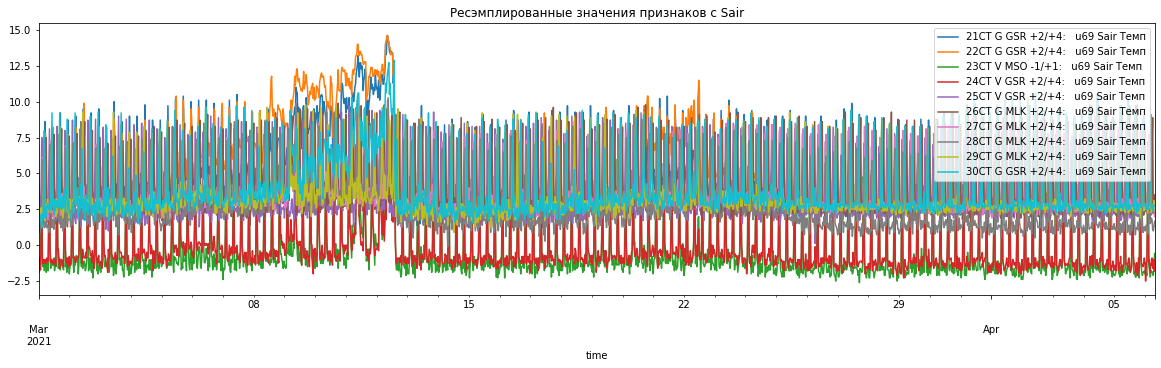

## 10. Сглаживание
10.	Постройте для 2-3 признаков из col_Sair сглаженный график поведения признаков во времени, чтобы был виден тренд
df.rolling()

<AxesSubplot:title={'center':'Сглаженные значения признаков с Sair'}, xlabel='time'>

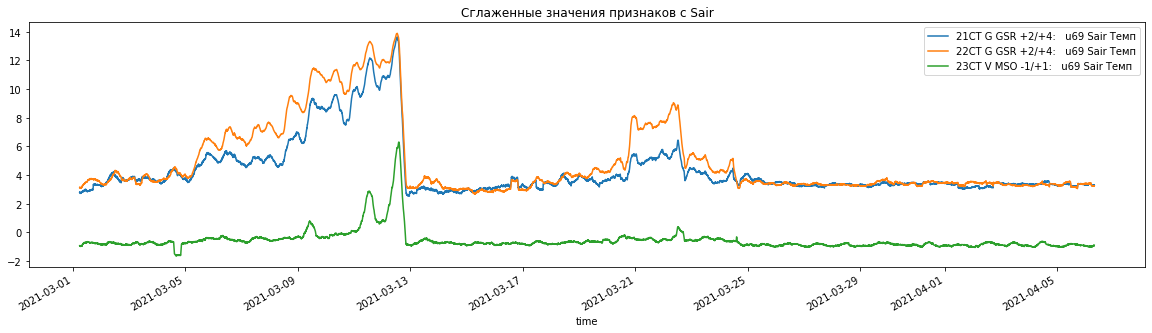

Разрывы, которые мы видим, возникли из-за того, что в данных есть пропущенные значения. Несмотря на то, что мы от них избавились, при построении графика с временным индексом они снова появились и стали гораздо виднее из-за сглаживания.

## 11. Визуализация разницы между ресэмплингом и сглаживанием

Для корректного отображения нам нужно привязываться не целочисленным индексам датафрейма, а к временным меткам, для этого нужно использовать df.loc[время от: время до].

Мы выберем одинаковые промежутки: 12 минут для ресэмплинга и 6 сэмплов для сглаживания (у нас сэмплы идут с периодом 2 минуты)

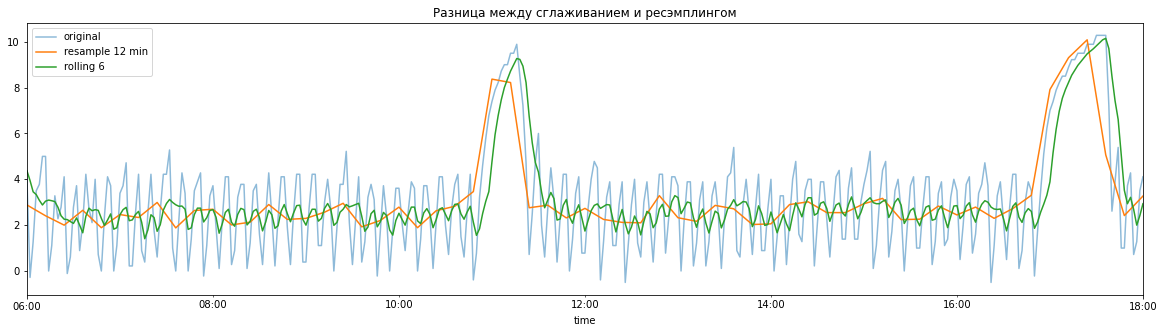

## 12. Гистограммы и столбчатые диаграммы
12.	Отобразите гистограмму по количеству одновременно включенных устройств. Признак состояния представлены в виде «<устройство>: --- EKC состояние», если признак принимает значение 0, то считаем устройство включенным.

<AxesSubplot:title={'center':'Количество одновременно включенных горок'}>

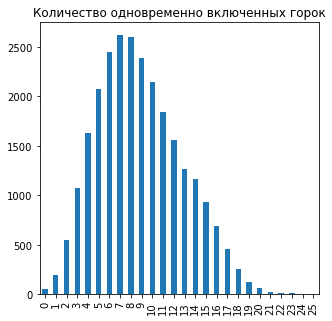

## 13. Subplots

13.	Постройте для нескольких признаков состояния устройств гистограммы, которые покажут распределение этих устройств по состояниям.
 
Используйте любой plt.bar или sns.barplot() и plt.subplots()

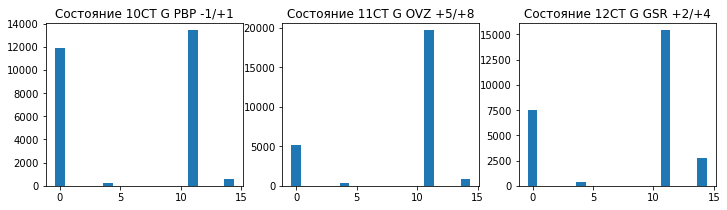

## 14. Матрица корреляции
14.	Постройте матрицу корреляции для признаков col_Sair
Получение таблицы с корреляцией: df.corr(), отрисовку удобно делать через sns.heatmap()

Text(0.5, 1.0, 'Матрица корреляции')

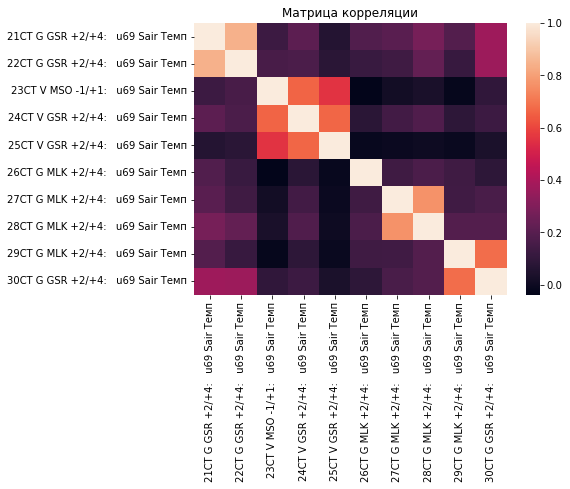

## 15. Свободная тема

15.	Творческое: сформулируйте гипотезу (вопрос) и проверьте ее (ответьте на него), подтвердив выводы визуализацией или статистиками.

**Гипотеза:**
Поведение температуры (тренд) u09 S5 в устройстве зависит от состояния устройства

**Данные:** проверка будет производиться на устройстве 11CT 

In [28]:
data.columns[:6]

Index(['10CT G PBP -1/+1:   --- EKC состояние',
       '10CT G PBP -1/+1:   u09 S5 Темп', '11CT G OVZ +5/+8:   u69 Sair Темп',
       '11CT G OVZ +5/+8:   u09 S5 Темп',
       '11CT G OVZ +5/+8:   --- EKC состояние',
       '12CT G GSR +2/+4:   u09 S5 Темп'],
      dtype='object')

In [29]:
cols = ['11CT G OVZ +5/+8:   u09 S5 Темп',
       '11CT G OVZ +5/+8:   --- EKC состояние']

df = data[cols].copy()
df.columns = ['Temperature', 'State']
df

,Temperature,State
time,,
2021-03-01 00:00:00,9.11,11
2021-03-01 00:02:00,9.11,11
2021-03-01 00:04:00,9.11,11
2021-03-01 00:06:00,5.22,0
2021-03-01 00:08:00,-9.28,11
...,...,...
2021-04-06 07:32:00,8.22,0
2021-04-06 07:34:00,-1.39,0
2021-04-06 07:36:00,-4.89,11


In [30]:
states = df['State'].value_counts()
states

11    19684
0      5180
14      909
4       353
10       19
Name: State, dtype: int64

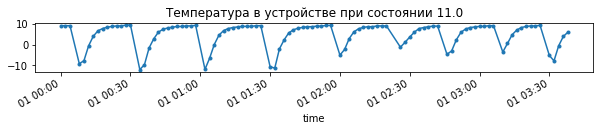

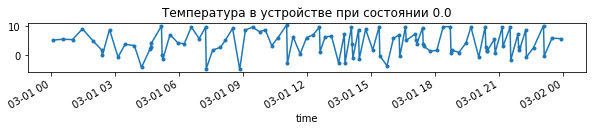

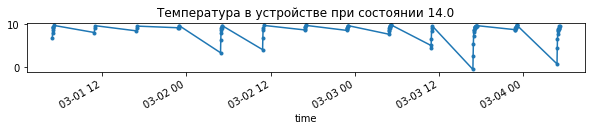

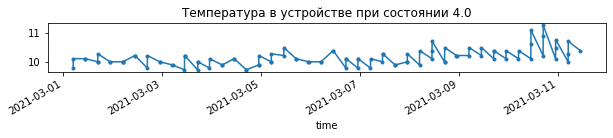

In [31]:
for state in [11.0, 0.0, 14.0, 4.0]:
    (
        df[df['State']==state]
        ['Temperature'][:100]
        .plot(figsize=(10,1), marker='.')
    )
    plt.title(f"Температура в устройстве при состоянии {state}")
    plt.show()

In [32]:
df = df.reset_index() # нам индекс понадобится дальше

In [33]:
df_stats = pd.DataFrame(columns = states.index)
t_delta = pd.Timedelta('2T')


for state in states.index:
    df1 = df[df['State']==state].copy()
    df1['index_diff'] = df1['time'].diff()
    df1['temp_diff'] = df1['Temperature'].diff()
    df_stats[state] = df1[df1['index_diff']==t_delta]['temp_diff'].describe()

df_stats

,11,0,14,4,10
count,16770.000000,2244.000000,764.000000,208.000000,18.000000
mean,2.754575,-7.349211,1.105471,0.229760,0.111111
std,2.457609,4.557101,1.728369,0.193457,0.347595
min,-18.720000,-21.220000,-10.110000,0.000000,-0.280000
25%,1.000000,-10.890000,0.330000,0.000000,0.000000
50%,2.000000,-8.470000,0.670000,0.280000,0.000000
75%,4.390000,-3.890000,1.500000,0.345000,0.000000
max,11.500000,4.610000,10.610000,0.670000,1.390000


**Вывод:**

Исходя из статистики можно сделать вывод, что в состоянии 11 температура медленно растет, в состоянии 0 - быстро падает, а в остальных состояниях практически не меняется, но для 10 состояния слишком мало наблюдений, чтобы сделать достоверный вывод